In [0]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import numpy as np

## Setting up training data

In [4]:
celsius_q    = np.array([-40, -10,  0,  8, 15, 22, 38],  dtype=float)
fahrenheit_a = np.array([-40,  14, 32, 46, 59, 72, 100], dtype=float)

for i, c in enumerate(celsius_q):
  print('{} degrees C = {} degrees F'.format(c, fahrenheit_a[i]))

-40.0 degrees C = -40.0 degrees F
-10.0 degrees C = 14.0 degrees F
0.0 degrees C = 32.0 degrees F
8.0 degrees C = 46.0 degrees F
15.0 degrees C = 59.0 degrees F
22.0 degrees C = 72.0 degrees F
38.0 degrees C = 100.0 degrees F


## Create a ML model

### Build a layer

In [0]:
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])

### Assemble layers into a model

In [0]:
model = tf.keras.Sequential([l0])

## Compile the model, with loss and optimizer

In [0]:
model.compile(loss='mean_squared_error', 
              optimizer=tf.keras.optimizers.Adam(0.1)) # learning rate

## Training the model

In [8]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print('Done training')

Done training


## Display training statistics

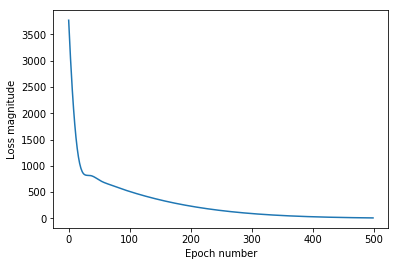

In [11]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch number')
plt.ylabel('Loss magnitude')
plt.plot(history.history['loss'])

## Use the model to predict values

In [14]:
print(model.predict([100]))
# correct answer = 212

[[211.31445]]


## Looking at the layer weights

In [15]:
print('These are the layer variables: {}'.format(l0.get_weights()))

These are the layer variables: [array([[1.8237424]], dtype=float32), array([28.940224], dtype=float32)]


### Just for fun experiment

In [16]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print('Done training')
print(model.predict([100]))
print('l0 variables: {}'.format(l0.get_weights()))
print('l1 variables: {}'.format(l1.get_weights()))
print('l2 variables: {}'.format(l2.get_weights()))


Done training
[[211.74744]]
l0 variables: [array([[-0.19761388,  0.58691466,  0.04534174, -0.24520905]],
      dtype=float32), array([ 1.5135323,  2.7354128, -2.195742 , -2.7568765], dtype=float32)]
l1 variables: [array([[ 0.29449114, -0.21868673,  0.02367475,  0.6411104 ],
       [ 0.28359222, -0.5183979 ,  1.0147765 ,  0.66126144],
       [ 0.30234426,  0.8466705 , -0.91961986, -0.20435508],
       [ 0.3836689 , -0.29688767, -0.7432688 , -1.205953  ]],
      dtype=float32), array([ 2.1191175, -2.5849357,  2.7457938,  2.7482064], dtype=float32)]
l2 variables: [array([[ 0.24581544],
       [-0.84773535],
       [ 1.4189973 ],
       [ 1.1428386 ]], dtype=float32), array([2.7101185], dtype=float32)]
